- Nama: Mega Intan Pratiwi
- Email: megaintanpratiwi20@gmail.com
- Id Dicoding: megaintanp202020

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# mengambil dataset batu gunting kertas atau rockpapersiccors
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2023-11-28 06:25:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 20.60.139.65
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|20.60.139.65|:443... connected.
HTTP request sent, awaiting response... 404 The specified resource does not exist.
2023-11-28 06:25:13 ERROR 404: The specified resource does not exist..



In [3]:
# install library split-folder untuk membuat folder
!pip install split-folders

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# melakukan ekstraksi pada file zip
import zipfile,os
# import splitfolders

local_zip = '/content/drive/MyDrive/dataset/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/dataset')
zip_ref.close()

# mendefinisikan nama direktori untuk data latih dan data validasi
base_dir = '/content/drive/MyDrive/dataset/rockpaperscissors/rps-cv-images'
# splitfolders.ratio(base_dir, output=base_dir, ratio=(0.8,0.2))

# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'val')

In [15]:
base_dir

'/content/drive/MyDrive/dataset/rockpaperscissors/rps-cv-images'

In [16]:
os.listdir(base_dir)

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']

In [ ]:
#os.listdir(train_dir)

In [ ]:
#os.listdir(validation_dir)

['paper', 'rock', 'scissors', 'train', 'val']

In [ ]:
# # membuat direktori batu pada direktori data training
# train_rock_dir = os.path.join(train_dir, 'rock')

# # membuat direktori gunting pada direktori data training
# train_scissor_dir = os.path.join(train_dir, 'scissors')

# # membuat direktori kertas pada direktori data training
# train_paper_dir = os.path.join(train_dir, 'paper')

# # membuat direktori batu pada direktori data validasi
# validation_rock_dir = os.path.join(validation_dir, 'rock')

# # membuat direktori gunting pada direktori data validasi
# validation_scissor_dir = os.path.join(validation_dir, 'scissors')

# # membuat direktori kertas pada direktori data validasi
# validation_paper_dir = os.path.join(validation_dir, 'paper')

In [17]:
# proses augmentasi gambar pada sampel data traininng
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   shear_range = 0.2,
                                   horizontal_flip=True,
                                   fill_mode = 'wrap',
                                   validation_split = 0.4)

#ImageDataGenerator(rescale=1./255,
                            #rotation_range=20,
                            #horizontal_flip=True,
                            #shear_range = 0.2,
                            #validation_split = 0.4,
                            #fill_mode = 'nearest')

# proses augmentasi gambar pada sampel data testing
test_datagen = ImageDataGenerator(rescale=1./255,
                                  zoom_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip=True,
                                  validation_split = 0.4)

In [18]:
# persiapan data training
train_generator = train_datagen.flow_from_directory(
        base_dir,
        # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        target_size=(100, 150),
        shuffle = True,
        subset='training',
        class_mode='categorical')

# persiapan data validasi
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        target_size=(100, 150),
        subset='validation',
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [19]:
model = tf.keras.models.Sequential([
    # Conv2D untuk mengekstrak atribut pada gambar
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    # max pooling untuk mengurangi resolusi gambar
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 46s - loss: 1.0075 - accuracy: 0.4740 - val_loss: 0.8094 - val_accuracy: 0.6375 - 46s/epoch - 2s/step
Epoch 2/25
25/25 - 41s - loss: 0.5363 - accuracy: 0.7857 - val_loss: 0.3114 - val_accuracy: 0.8813 - 41s/epoch - 2s/step
Epoch 3/25
25/25 - 39s - loss: 0.3512 - accuracy: 0.8649 - val_loss: 0.2629 - val_accuracy: 0.9250 - 39s/epoch - 2s/step
Epoch 4/25
25/25 - 41s - loss: 0.2418 - accuracy: 0.9125 - val_loss: 0.2034 - val_accuracy: 0.9250 - 41s/epoch - 2s/step
Epoch 5/25
25/25 - 37s - loss: 0.2072 - accuracy: 0.9351 - val_loss: 0.1083 - val_accuracy: 0.9688 - 37s/epoch - 1s/step
Epoch 6/25
25/25 - 40s - loss: 0.1829 - accuracy: 0.9416 - val_loss: 0.1680 - val_accuracy: 0.9375 - 40s/epoch - 2s/step
Epoch 7/25
25/25 - 38s - loss: 0.2227 - accuracy: 0.9286 - val_loss: 0.1207 - val_accuracy: 0.9500 - 38s/epoch - 2s/step
Epoch 8/25
25/25 - 40s - loss: 0.4152 - accuracy: 0.8545 - val_loss: 0.5735 - val_accuracy: 0.7500 - 40s/epoch - 2s/step
Epoch 9/25
25/25 - 39s - loss: 0

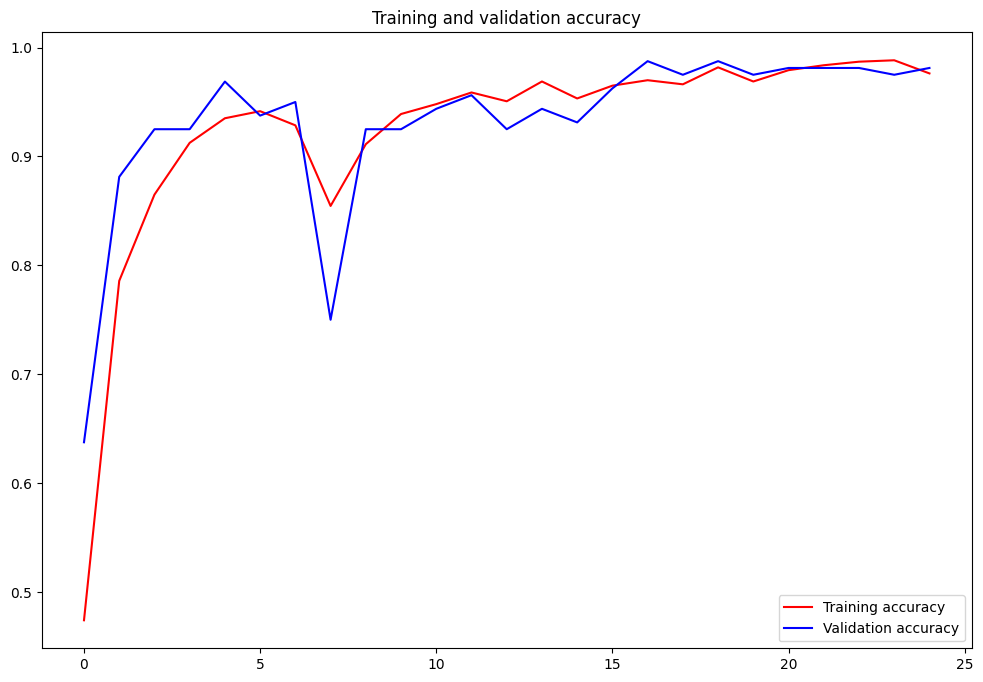

In [22]:
import matplotlib.pyplot as plt

accur = history.history['accuracy']
val_accur = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accur))

plt.figure(figsize=(12,8))
plt.plot(epochs, accur, 'r', label='Training accuracy')
plt.plot(epochs, val_accur, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [23]:
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


In [24]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()

with open("modelImageCNN.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("modelImageCNN.h5")

Saving 1DxbXT3M2qiMjCmC.png to 1DxbXT3M2qiMjCmC.png
1/1 [==============================] - 1s 548ms/step
1DxbXT3M2qiMjCmC.png
rock


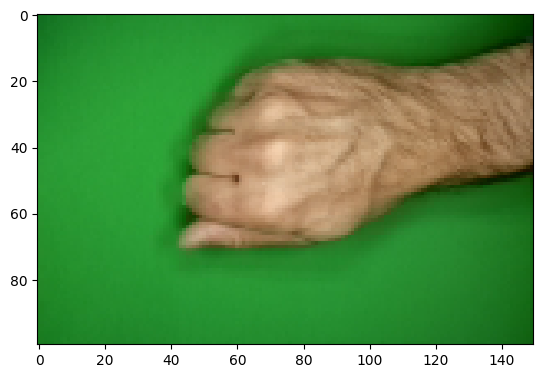

In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# mengupload file, trus ditampung disini
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  # memilih file gambar secara interaktif
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  # resize gambar dan mengubahnya menjadi larik numpy
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  outclass = np.argmax(classes)

  print(fn)
  if outclass == 0:
    print('paper')
  elif outclass == 1:
    print('rock')
  else:
    print('scissors')